# Face Face Recognition Sytem

In [1]:
import os
import cv2
import numpy as np
import pandas as pd

from insightface.app import FaceAnalysis

In [2]:
# configure face analysis
faceapp = FaceAnalysis(name='buffalo_sc',
                       root='insightface_models',
                       providers=['CPUExecutionProvider'])

faceapp.prepare(ctx_id=0, det_size=(640,640), det_thresh=0.5)
# warning: don't set det_thresh < 0.3

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_models\models\buffalo_sc\det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_models\models\buffalo_sc\w600k_mbf.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [3]:
#faceapp.get()

#### Extract Facial Features and labels

In [4]:
os.listdir(path='images_folder')

['Student-Actor_Vijay',
 'Student-Amitabh_Bhachchan',
 'Student-Arvind_Kejriwal',
 'Teacher-Abdul_Kalam',
 'Teacher-Narendra_Modi']

In [6]:
import os

root_folder = 'images_folder'  # Update this with the actual path to the root folder containing Vijay, Dhoni, Kohli, etc.

# List all subfolders in the root folder
subfolders = [f.name for f in os.scandir(root_folder) if f.is_dir()]

for folder_name in subfolders:
    folder_path = os.path.join(root_folder, folder_name)

    # Check if the folder exists
    if os.path.exists(folder_path):
        # List all files in the folder
        files = os.listdir(folder_path)

        # Filter out only the image files (you can adjust this based on your image file extensions)
        image_files = [file for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

        # Rename the files
        for i, old_name in enumerate(image_files, start=1):
            extension = os.path.splitext(old_name)[1]
            new_name = f'{folder_name}{i}{extension}'
            old_path = os.path.join(folder_path, old_name)
            new_path = os.path.join(folder_path, new_name)
            os.rename(old_path, new_path)

        print(f'Files in {folder_name} successfully renamed.')
    else:
        print(f'Folder {folder_name} not found.')


In [7]:
import re # regular expression

In [8]:
def clean_name(string):
    # Allow only A-Z a-z
    string = re.sub(r'[^A-Za-z]',' ',string)
    string = string.title()
    return string

In [9]:
person_info = []
listdir = os.listdir(path='images_folder')
for folder_name in listdir:
    role, name = folder_name.split('-')
    name = clean_name(name)
    role = clean_name(role)
    #print('Role =',role,end='\t')
    #print('Name =', name)
    
    # path of each image in respective folder
    img_files = os.listdir(path= f'images_folder/{folder_name}')
    for file in img_files:
        path = f'./images_folder/{folder_name}/{file}'
        # step-1: read the image
        img_arr = cv2.imread(path)      
        
        # step-2: get the info
        result = faceapp.get(img_arr,max_num=1) # max_num of faces to be detected = 1 & return list
        
        if len(result) > 0:
            # step-3: extract facial embedding
            res = result[0] # value of first face
            embedding = res['embedding']
            # step-4: save all info name, role, embedding in a list
            person_info.append([name, role, embedding])

In [10]:
dataframe = pd.DataFrame(person_info,columns=['Name','Role','Facial_Features'])
dataframe # store in redis

,Name,Role,Facial_Features
0,Actor Vijay,Student,"[-0.8978046, -0.32325628, 0.26394755, 0.784470..."
1,Actor Vijay,Student,"[-0.5776719, -2.3836565, -1.3426458, 0.4115207..."
2,Actor Vijay,Student,"[-0.5428229, -0.48671067, -0.50478214, 0.03538..."
3,Actor Vijay,Student,"[-0.8115385, -0.79952544, -0.86645126, 0.47676..."
4,Actor Vijay,Student,"[-0.91583705, -0.58741677, -0.32335347, 1.4487..."
5,Actor Vijay,Student,"[-1.3744632, -0.5467888, -0.122808546, 0.71200..."
6,Actor Vijay,Student,"[-0.99775016, -1.7682585, -1.085271, 0.1927225..."
7,Actor Vijay,Student,"[-0.93460107, -0.43411183, -0.4474879, 0.10718..."
8,Actor Vijay,Student,"[-0.053069793, -1.2764479, -0.2525001, -0.0783..."
9,Actor Vijay,Student,"[-0.6689886, -1.4525086, -0.84837645, -0.66022..."


## Inference

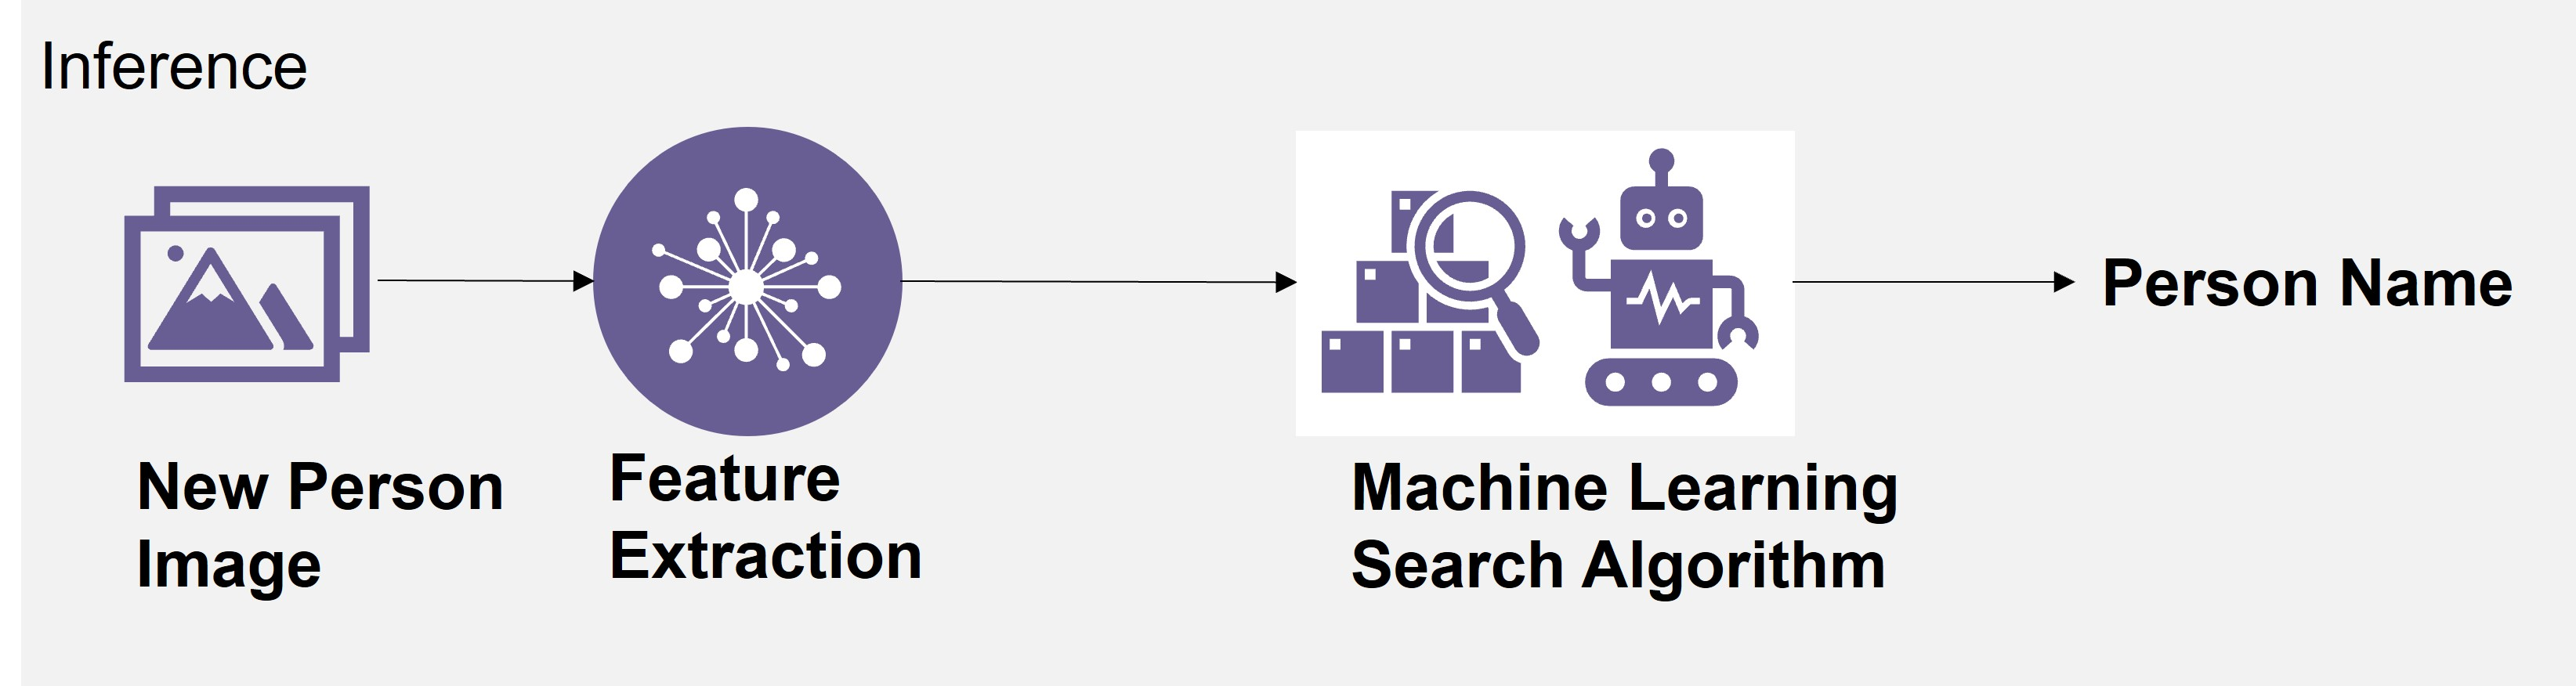

#### step-1: read image

In [29]:
# read test image
img_test = cv2.imread('test_images/test_image.jpg')
cv2.imshow('test image',img_test)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### step -2: Extract Feature

In [30]:
res_test = faceapp.get(img_test,max_num=0)   # process all faces in the image.
for i, rt in enumerate(res_test):
    print('current loop =',i)
    bbox = rt['bbox'].astype(int)
    score = int(rt['det_score']*100)
    embed_test = rt['embedding']
    

current loop = 0


In [31]:
# consider only one sample
len(embed_test)

512

In [32]:
embed_test

array([ 3.56459320e-01, -1.19365764e+00, -1.37534106e+00,  1.41451210e-01,
       -1.94294262e+00, -1.04653692e+00,  1.69509435e+00,  2.09071159e+00,
       -1.11160779e+00,  6.94927454e-01,  4.26255137e-01, -4.74634230e-01,
        3.35022956e-01, -1.25254476e+00, -9.73083019e-01,  5.50213993e-01,
        5.19117475e-01,  1.30035758e-01,  1.23372614e+00, -1.16946828e+00,
       -5.99391222e-01,  3.98046613e-01,  5.68323493e-01, -4.56388652e-01,
       -1.17411411e+00,  5.64213932e-01, -1.76545572e+00,  6.93717301e-01,
       -3.84413809e-01, -1.30608559e+00,  3.49449277e-01, -2.79125720e-02,
        5.04428804e-01, -6.93058968e-01, -1.27816093e+00, -5.58488786e-01,
       -5.83748162e-01, -1.07760215e+00,  6.77875459e-01, -1.12084925e-01,
       -9.02123451e-01, -8.77652884e-01,  1.01531792e+00, -1.75684988e-02,
       -1.43600678e+00,  9.77792889e-02, -1.85222900e+00,  1.91734242e+00,
       -5.43301046e-01, -2.69918144e-01,  6.41689718e-01,  6.00222111e-01,
       -3.79153877e-01,  

#### Algorithm

In [33]:
X_list =  dataframe['Facial_Features'].tolist()
X = np.asarray(X_list)

In [34]:
X.shape

(50, 512)

In [35]:
from sklearn.metrics import pairwise

In [36]:
# distance check between images and test image
y = embed_test.reshape(1,512) # 1 x 512

equlidean_distance = pairwise.euclidean_distances(X,y)
manhattan_distance = pairwise.manhattan_distances(X,y)
cosine_similar = pairwise.cosine_similarity(X,y)

In [37]:
data_search = dataframe.copy()
data_search['equlidean'] = equlidean_distance
data_search['manhattan'] = manhattan_distance
data_search['cosine'] = cosine_similar

In [38]:
data_search.head(2)

,Name,Role,Facial_Features,equlidean,manhattan,cosine
0,Actor Vijay,Student,"[-0.8978046, -0.32325628, 0.26394755, 0.784470...",22.319834,404.375115,0.603388
1,Actor Vijay,Student,"[-0.5776719, -2.3836565, -1.3426458, 0.4115207...",21.386515,380.804347,0.652755


In [39]:
import matplotlib.pyplot as plt

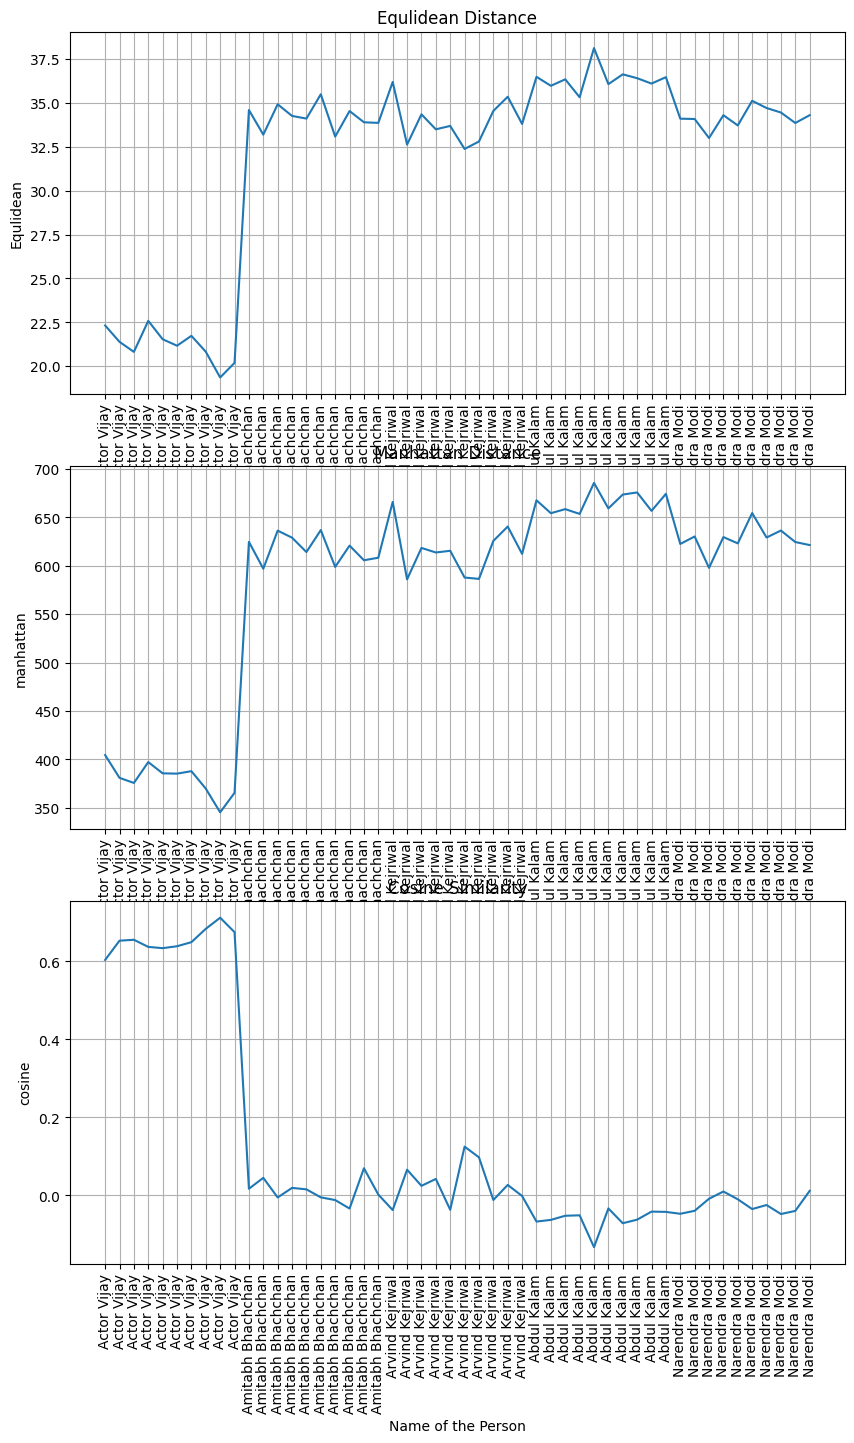

In [40]:
plt.figure(figsize=(10,16))
plt.subplot(3,1,1)
plt.plot(data_search['equlidean'],)
plt.xticks(ticks=list(range(len(data_search['equlidean']))),
           labels=data_search['Name'],rotation=90)
plt.xlabel('Name of the Person')
plt.ylabel('Equlidean')
plt.title('Equlidean Distance')
plt.grid()

plt.subplot(3,1,2)
plt.plot(data_search['manhattan'],)
plt.xticks(ticks=list(range(len(data_search['manhattan']))),
           labels=data_search['Name'],rotation=90)
plt.xlabel('Name of the Person')
plt.ylabel('manhattan')
plt.title('Manhattan Distance')
plt.grid()


plt.subplot(3,1,3)
plt.plot(data_search['cosine'],)
plt.xticks(ticks=list(range(len(data_search['cosine']))),
           labels=data_search['Name'],rotation=90)
plt.xlabel('Name of the Person')
plt.ylabel('cosine')
plt.title('Cosine Similarity')
plt.grid()


plt.show()

### Identify the Person using Equlidean Distance

In [41]:
d_eq_optimal = 25

In [42]:
datafilter = data_search.query(f'equlidean < {d_eq_optimal}')
datafilter.reset_index(drop=True,inplace=True)

if len(datafilter) > 0:
    argmin = datafilter['equlidean'].argmin()
    name , role = datafilter.loc[argmin][['Name','Role']]
    
else:
    name = 'Unknown'
    role = 'Unknown'

In [43]:
print(name, role)

Actor Vijay Student


### Identify the Person using Manhattan Distance

In [44]:
d_man_optimal = 450

In [45]:
datafilter = data_search.query(f'manhattan < {d_man_optimal}')
datafilter.reset_index(drop=True,inplace=True)

if len(datafilter) > 0:
    argmin = datafilter['manhattan'].argmin()
    name_man , role_man = datafilter.loc[argmin][['Name','Role']]
    
else:
    name_man = 'Unknown'
    role_man = 'Unknown'

In [46]:
print(name, role)

Actor Vijay Student


### Identify the Person using Cosine Similarity

In [47]:
S_opt = 0.4

In [48]:
datafilter = data_search.query(f'cosine > {S_opt}')
datafilter.reset_index(drop=True,inplace=True)

if len(datafilter) > 0:
    argmax = datafilter['cosine'].argmax()
    name_cos , role_cos = datafilter.loc[argmax][['Name','Role']]
    
else:
    name_cos = 'Unknown'
    role_cos = 'Unknown'

In [49]:
print(name_cos, role_cos)

Actor Vijay Student


In [50]:
datafilter

,Name,Role,Facial_Features,equlidean,manhattan,cosine
0,Actor Vijay,Student,"[-0.8978046, -0.32325628, 0.26394755, 0.784470...",22.319834,404.375115,0.603388
1,Actor Vijay,Student,"[-0.5776719, -2.3836565, -1.3426458, 0.4115207...",21.386515,380.804347,0.652755
2,Actor Vijay,Student,"[-0.5428229, -0.48671067, -0.50478214, 0.03538...",20.812786,375.551132,0.655079
3,Actor Vijay,Student,"[-0.8115385, -0.79952544, -0.86645126, 0.47676...",22.582478,397.114658,0.636858
4,Actor Vijay,Student,"[-0.91583705, -0.58741677, -0.32335347, 1.4487...",21.534603,385.469983,0.633590
5,Actor Vijay,Student,"[-1.3744632, -0.5467888, -0.122808546, 0.71200...",21.165302,385.175263,0.638513
6,Actor Vijay,Student,"[-0.99775016, -1.7682585, -1.085271, 0.1927225...",21.728861,387.692743,0.648941
7,Actor Vijay,Student,"[-0.93460107, -0.43411183, -0.4474879, 0.10718...",20.822834,369.684086,0.683151
8,Actor Vijay,Student,"[-0.053069793, -1.2764479, -0.2525001, -0.0783...",19.354877,345.211841,0.711632
9,Actor Vijay,Student,"[-0.6689886, -1.4525086, -0.84837645, -0.66022...",20.186787,365.304466,0.674633


### Identify Multiple Person in an Image

In [51]:
def ml_search_algorithm(dataframe,feature_column,test_vector,
                        name_role=['Name','Role'],thresh=0.5):
    """
    cosine similarity base search algorithm
    """
    # step-1: take the dataframe (collection of data)
    dataframe = dataframe.copy()
    # step-2: Index face embeding from the dataframe and convert into array
    X_list = dataframe[feature_column].tolist()
    x = np.asarray(X_list)
    
    # step-3: Cal. cosine similarity
    similar = pairwise.cosine_similarity(x,test_vector.reshape(1,-1))
    similar_arr = np.array(similar).flatten()
    dataframe['cosine'] = similar_arr

    # step-4: filter the data
    data_filter = dataframe.query(f'cosine >= {thresh}')
    if len(data_filter) > 0:
        # step-5: get the person name
        data_filter.reset_index(drop=True,inplace=True)
        argmax = data_filter['cosine'].argmax()
        person_name, person_role = data_filter.loc[argmax][name_role]
        
    else:
        person_name = 'Unknown'
        person_role = 'Unknown'
        
    return person_name, person_role

In [147]:
test_image = cv2.imread('test_images/test_10.jpg')
cv2.imshow('test image',test_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [148]:
# step-1: take the test image and apply to insight face
results = faceapp.get(test_image)
test_copy = test_image.copy()
# step-2: use for loop and extract each embedding and pass to ml_search_algorithm

for res in results:
    x1, y1, x2, y2 = res['bbox'].astype(int)
    embeddings = res['embedding']
    person_name, person_role = ml_search_algorithm(dataframe_compress,
                                                   'Facial_Features',
                                                   test_vector=embeddings,
                                                   name_role=['Name','Role'],
                                                   thresh=0.5)
    if person_name == 'Unknown':
        color =(0,0,255) # bgr
    else:
        color = (0,255,0)
        
        
    cv2.rectangle(test_copy,(x1,y1),(x2,y2),color)
    
    text_gen = person_name
    cv2.putText(test_copy,text_gen,(x1,y1),cv2.FONT_HERSHEY_DUPLEX,0.7,color,2)
    
    
cv2.imshow('test image',test_copy)
cv2.waitKey()
cv2.destroyAllWindows()

### Compressing my dataset

In [52]:
dataframe_compress = dataframe.groupby(by=['Name','Role']).mean()
dataframe_compress.reset_index(inplace=True)
dataframe_compress

,Name,Role,Facial_Features
0,Abdul Kalam,Teacher,"[-0.38639936, -1.201683, 0.17475073, -0.233374..."
1,Actor Vijay,Student,"[-0.77745473, -1.0058682, -0.5529729, 0.343021..."
2,Amitabh Bhachchan,Student,"[-0.14923494, 1.0485445, -0.41196242, 0.844359..."
3,Arvind Kejriwal,Student,"[-0.349936, 0.009792837, 0.09995638, -0.312416..."
4,Narendra Modi,Teacher,"[-0.13332304, -0.12751162, -0.07908755, -0.151..."


#### convert dataframe into array and save in numpy zip format

In [53]:
xvalues = dataframe_compress.values

In [54]:
col_name = np.array(dataframe_compress.columns)
col_name

array(['Name', 'Role', 'Facial_Features'], dtype=object)

In [55]:
np.savez('dataframe_students_teacher.npz',xvalues,col_name)

In [56]:
# load the numpy zip
file_np = np.load('dataframe_students_teacher.npz',allow_pickle=True)
file_np.files

['arr_0', 'arr_1']

In [57]:
pd.DataFrame(file_np['arr_0'],columns=file_np['arr_1'])

,Name,Role,Facial_Features
0,Abdul Kalam,Teacher,"[-0.38639936, -1.201683, 0.17475073, -0.233374..."
1,Actor Vijay,Student,"[-0.77745473, -1.0058682, -0.5529729, 0.343021..."
2,Amitabh Bhachchan,Student,"[-0.14923494, 1.0485445, -0.41196242, 0.844359..."
3,Arvind Kejriwal,Student,"[-0.349936, 0.009792837, 0.09995638, -0.312416..."
4,Narendra Modi,Teacher,"[-0.13332304, -0.12751162, -0.07908755, -0.151..."


### [END](https://www.udemy.com/user/freeai-space/)
---